# Data Preparation:

Data obtained from the MNIST database website (LeCun, Cortes, Burges) [here](http://yann.lecun.com/exdb/mnist/), downloaded locally through browser. 

The files are in IDX form, see the bottom of the linked page for more information.  We use the idx2numpy package to handle the data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import math
import tensorflow as tf

# Note: If you are using Anaconda and you used PIP install in the prompt to get the pacakge, 
# you need to make sure it's installed to the correct environment. For example, use 
# "activate py36" in the prompt before installing the package.

try:
    import idx2numpy
except:
    print("Package not found.")

In [2]:
# Read the IDX file in as a numpy array. I have the data saved in a folder labeled MNIST.

train_images = idx2numpy.convert_from_file('MNIST//train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('MNIST//train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('MNIST//t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('MNIST//t10k-labels.idx1-ubyte')

A function to check that the data makes sense. 

The image data is stored as what could be described as an a array of matrices, so that for example, train_images\[0\] is a $28\times 28$ matrix of grey-scale integer pixel values (0=white, 255 = black). The pyplot imshow function will display such a matrix as an image. 

In [3]:
def show_random_image(image_array, label_array):
    num_images = len(image_array)
    random_int = random.randint(0,num_images-1)
    plt.imshow(image_array[random_int], cmap = 'Greys')
    print("Index: " + str(random_int))
    print("Label: " + str(label_array[random_int]))
    return

Index: 30205
Label: 9


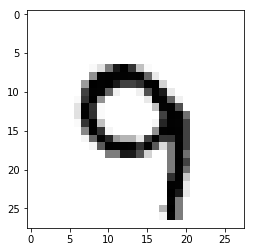

In [4]:
show_random_image(train_images, train_labels)

Index: 239
Label: 1


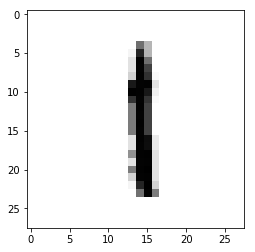

In [5]:
show_random_image(test_images, test_labels)

## Check for data balance:

We should know whether or not every class occurs equally as often (called *balance*). It appears that the dataset has 1300 more instances of 1 (most) than 5 (least). It could be that they added more data for those numbers that were most likely to be confused, or simply because those are the numbers appearing most in postal addresses.  

In [6]:
train_class_count = Counter()
for label in train_labels:
    train_class_count[label] += 1
    
print("Instance of classes: ", end = '')
print(train_class_count)

Instance of classes: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


In [7]:
test_class_count = Counter()
for label in test_labels:
    test_class_count[label] += 1
    
print("Instance of classes: ", end = '')
print(test_class_count)

Instance of classes: Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


## Construct a balanced training/validation set:



In [8]:
def train_validation_split(data_array, label_array, train_ratio):
    labels = np.unique(label_array) # An array of the distinct entry values occuring in the argument.
    train_indices = []
    valid_indices = []
    for label in labels:
        label_indices = [i for i,x in enumerate(label_array) if x == label]
        instance_count = len(label_indices)
        partition = int(math.floor(train_ratio*instance_count))
        random.shuffle(label_indices)
        to_train = label_indices[:partition]
        to_valid = label_indices[partition:]
        train_indices = train_indices + to_train
        valid_indices = valid_indices + to_valid
    random.shuffle(train_indices)
    random.shuffle(valid_indices)
    train_data = data_array[train_indices]
    train_labels = label_array[train_indices]
    valid_data = data_array[valid_indices]
    valid_labels = label_array[valid_indices]
    return train_data, train_labels, valid_data, valid_labels

In [9]:
train_images, train_labels, valid_images, valid_labels = train_validation_split(train_images, train_labels, .8)

print("Test Size: " + str(len(train_images)))
print("Validation Size: " + str(len(valid_images)))

train_class_count = Counter()
for label in train_labels:
    train_class_count[label] += 1
    
print("Instance of classes: ", end = '')
print(train_class_count)

valid_class_count = Counter()
for label in valid_labels:
    valid_class_count[label] += 1
    
print("Instance of classes: ", end = '')
print(valid_class_count)

Test Size: 47995
Validation Size: 12005
Instance of classes: Counter({1: 5393, 7: 5012, 3: 4904, 2: 4766, 9: 4759, 0: 4738, 6: 4734, 8: 4680, 4: 4673, 5: 4336})
Instance of classes: Counter({1: 1349, 7: 1253, 3: 1227, 2: 1192, 9: 1190, 0: 1185, 6: 1184, 8: 1171, 4: 1169, 5: 1085})


Index: 16545
Label: 2


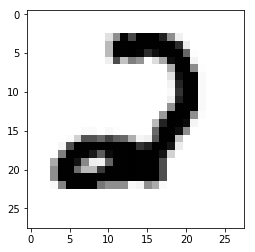

In [10]:
show_random_image(train_images, train_labels)

Index: 5301
Label: 3


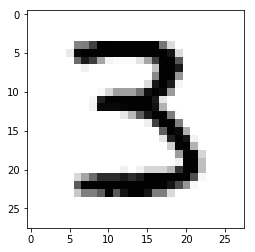

In [11]:
show_random_image(valid_images, valid_labels)

Reformat the data as a 2 dimensional array for matrix operations.

In [12]:
# Flatten images, normalize them between -1 and 1, and one-hot encode the labels. 

def reformat(images, labels):
    out_images = images.reshape((-1,28*28)).astype(np.float32)
    out_images = (out_images-(255.)/2)/255.
    out_labels = (np.arange(10) == labels[:,None]).astype(np.float32)
    return out_images, out_labels

# Unflatten images. Need: unencode labels [gracefully - probably np.where(array = 1) somehow].

def unreformat(images):
    out_images = images.reshape((-1,28,28)).astype(np.float32)
    return out_images

In [13]:
train_images, train_labels = reformat(train_images, train_labels)
valid_images, valid_labels = reformat(valid_images, valid_labels)
test_images, test_labels = reformat(test_images, test_labels)

In [14]:
print("Training Data Shape: " + str(train_images.shape))
print("Validation Data Shape: " + str(valid_images.shape))
print("Test Data Shape: " + str(test_images.shape))

print("Training Labels Shape: " + str(train_labels.shape))
print("Validation Labels Shape: " + str(valid_labels.shape))
print("Test Labels Shape: " + str(test_labels.shape))

Training Data Shape: (47995, 784)
Validation Data Shape: (12005, 784)
Test Data Shape: (10000, 784)
Training Labels Shape: (47995, 10)
Validation Labels Shape: (12005, 10)
Test Labels Shape: (10000, 10)


# Neural Network Constructions:

In [15]:
def accuracy(predicted_labels, true_labels):
    return(100*np.sum(np.argmax(predicted_labels, 1)==np.argmax(true_labels, 1))
           /predicted_labels.shape[0])

## Simple regression classifier

In [16]:
regression_graph = tf.Graph()

with regression_graph.as_default():
    # Feed in the constant data.
    T = tf.constant(train_images)
    Tlabel = tf.constant(train_labels)
    V = tf.constant(valid_images)
    E = tf.constant(test_images)
    # Establish variable matrix and bias vector.
    W = tf.Variable(tf.truncated_normal([784, 10])) # Randomly initialized.
    b = tf.Variable(tf.zeros([10])) # Initialized at origin. 
    # Do the logit computation.
    L = tf.matmul(T,W)+b
    # Do the softmax and crossentropy.
    l = tf.nn.softmax_cross_entropy_with_logits(labels = Tlabel, logits = L)
    # Take the average to get the loss function output.
    loss = tf.reduce_mean(l)
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    # Monitoring outputs.
    train_predictions = tf.nn.softmax(L)
    valid_predictions = tf.nn.softmax(tf.matmul(V,W)+b)
    test_predictions = tf.nn.softmax(tf.matmul(E,W)+b)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
number_of_iterations = 1000

with tf.Session(graph = regression_graph) as session:
    tf.global_variables_initializer().run()
    print('Variables Initialized')
    for iteration in range(number_of_iterations):
        session.run(optimizer)
        if (iteration % 100 == 0):
            print('Iteration %d: ' % iteration, end="")
            l = loss.eval()
            print('loss = %f, ' % l, end="")
            train_predict = train_predictions.eval()
            print(' training accuracy = %.1f%%' % accuracy(train_predict, train_labels), end=", ")
            valid_predict = valid_predictions.eval()
            print(' validation accuracy = %.1f%%.' % accuracy(valid_predict, valid_labels))
    test_predict = test_predictions.eval()
    print('Test accuracy: %.1f%%' % accuracy(test_predict, test_labels))

Variables Initialized
Iteration 0: loss = 14.652564,  training accuracy = 9.7%,  validation accuracy = 9.7%.
Iteration 100: loss = 1.189335,  training accuracy = 75.3%,  validation accuracy = 75.2%.
Iteration 200: loss = 0.861220,  training accuracy = 81.2%,  validation accuracy = 81.3%.
Iteration 300: loss = 0.726796,  training accuracy = 83.7%,  validation accuracy = 83.5%.
Iteration 400: loss = 0.649219,  training accuracy = 85.1%,  validation accuracy = 84.8%.
Iteration 500: loss = 0.597067,  training accuracy = 86.0%,  validation accuracy = 85.6%.
Iteration 600: loss = 0.558825,  training accuracy = 86.6%,  validation accuracy = 86.2%.
Iteration 700: loss = 0.529230,  training accuracy = 87.2%,  validation accuracy = 86.7%.
Iteration 800: loss = 0.505484,  training accuracy = 87.6%,  validation accuracy = 87.2%.
Iteration 900: loss = 0.485915,  training accuracy = 88.0%,  validation accuracy = 87.5%.
Test accuracy: 88.4%


## Stochastic Regression

Train with small batches instead of the whole dataset at once. 

In [18]:
stochastic_regression_graph = tf.Graph()
batch_size = 1000

with stochastic_regression_graph.as_default():
    # Placeholders to feed batches of training data.
    T = tf.placeholder(tf.float32, shape=(batch_size, 784)) # Trains batches of 100.
    Tlabel = tf.placeholder(tf.float32, shape=(batch_size, 10))
    # Validation and test data remain constant.
    V = tf.constant(valid_images)
    E = tf.constant(test_images)
    # Establish variable matrix and bias vector.
    W = tf.Variable(tf.truncated_normal([784, 10])) # Randomly initialized.
    b = tf.Variable(tf.zeros([10])) # Initialized at origin. 
    # logit computation
    L = tf.matmul(T,W)+b
    # softmax, crossentropy and loss
    smce = tf.nn.softmax_cross_entropy_with_logits(labels = Tlabel, logits = L)
    loss = tf.reduce_mean(smce)
    # Optimize
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    # Monitoring outputs.
    train_predictions = tf.nn.softmax(L)
    valid_predictions = tf.nn.softmax(tf.matmul(V,W)+b)
    test_predictions = tf.nn.softmax(tf.matmul(E,W)+b)

In [19]:
number_of_epochs = 1000

with tf.Session(graph = stochastic_regression_graph) as session:
    tf.global_variables_initializer().run()
    epoch = 0
    print('Variables Initialized.')
    last_offset = 0
    iteration = 0
    inner_epoch_samples = 0
    last_epoch = -1
    while epoch <= number_of_epochs+1:
        # Generate Batches
        offset = (iteration * batch_size) % (train_labels.shape[0]-batch_size)
        batch_data = train_images[offset :(offset + batch_size), : ]
        batch_labels = train_labels[offset : (offset + batch_size), : ]
        
        # Randomize Within Batch: This slows things down but may be better pratice.
        randomized_indices = list(range(batch_size))
        random.shuffle(randomized_indices)
        randomized_batch_data = batch_data[randomized_indices]
        randomized_batch_labels = batch_labels[randomized_indices]
        
        # Run Model
        feed_dict = {T : randomized_batch_data, Tlabel : randomized_batch_labels}
        _, l, train_predict = session.run([optimizer, loss, train_predictions], feed_dict = feed_dict)
        iteration += 1
        inner_epoch_samples += batch_size
        
        # Report
        if (epoch % 100) == 0 and epoch > last_epoch:
            print('Epoch %d, Iteration: %d' % (epoch, iteration))
            print('loss = %f' % l, end = ", ")
            train_acc = accuracy(train_predict, randomized_batch_labels)
            print('training accuracy = %.1f%%' % train_acc, end = ", ")
            valid_acc = accuracy(valid_predictions.eval(), valid_labels)
            print('validation accuracy = %.1f%%.' % valid_acc)
            last_epoch = epoch
        if inner_epoch_samples - train_labels.shape[0] > 0:
            inner_epoch_samples = inner_epoch_samples - (train_labels.shape[0]+1)
            epoch += 1
    test_predict = test_predictions.eval()
    print('Test accuracy: %.1f%%' % accuracy(test_predict, test_labels))

Variables Initialized.
Epoch 0, Iteration: 1
loss = 13.845592, training accuracy = 9.3%, validation accuracy = 15.3%.
Epoch 100, Iteration: 4801
loss = 0.283729, training accuracy = 92.1%, validation accuracy = 90.6%.
Epoch 200, Iteration: 9601
loss = 0.268764, training accuracy = 92.6%, validation accuracy = 90.9%.
Epoch 300, Iteration: 14400
loss = 0.301649, training accuracy = 92.5%, validation accuracy = 91.2%.
Epoch 400, Iteration: 19200
loss = 0.191351, training accuracy = 94.4%, validation accuracy = 91.5%.
Epoch 500, Iteration: 23999
loss = 0.255783, training accuracy = 93.3%, validation accuracy = 91.4%.
Epoch 600, Iteration: 28799
loss = 0.261805, training accuracy = 93.2%, validation accuracy = 91.7%.
Epoch 700, Iteration: 33599
loss = 0.234398, training accuracy = 93.6%, validation accuracy = 91.7%.
Epoch 800, Iteration: 38398
loss = 0.172036, training accuracy = 95.1%, validation accuracy = 91.5%.
Epoch 900, Iteration: 43198
loss = 0.229250, training accuracy = 93.8%, vali

## Fully Connected Neural Network, 1 Hidden Layer

In [20]:
batch_size = 100
number_of_nodes = 1024 # Note: Results in a bigger network, so decrease learning rate. 

FCNN_1HL_graph = tf.Graph()

def FCNN_1HL_model(data, dropout = True):
        log1 = tf.matmul(data, W1) + b1
        hid1 = tf.nn.leaky_relu(log1)
        if dropout:
            hid1 = tf.nn.dropout(hid1, keep_prob = .5)
        log2 = tf.matmul(hid1, W2)+b2
        return log2

with FCNN_1HL_graph.as_default():
    T = tf.placeholder(tf.float32, shape=(batch_size, 784)) # Trains batches of 100.
    Tlabel = tf.placeholder(tf.float32, shape=(batch_size, 10))
    # Validation and test data remain constant.
    V = tf.constant(valid_images)
    E = tf.constant(test_images)
    # Establish variable matrices and bias vectors.
    W1 = tf.Variable(tf.random_normal([784, number_of_nodes]))
    b1 = tf.Variable(tf.zeros([number_of_nodes]))
    W2 = tf.Variable(tf.truncated_normal([number_of_nodes, 10]))
    b2 = tf.Variable(tf.zeros([10])) 
    # Model
    L = FCNN_1HL_model(T)
    # logits, softmax, crossentropy and loss
    smce = tf.nn.softmax_cross_entropy_with_logits(labels = Tlabel, logits = L)
    loss = tf.reduce_mean(smce)
    # Optimize
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
    # Monitoring outputs.
    train_predictions = tf.nn.softmax(FCNN_1HL_model(T, dropout = False))
    valid_predictions = tf.nn.softmax(FCNN_1HL_model(V, dropout = False))
    test_predictions = tf.nn.softmax(FCNN_1HL_model(E, dropout = False))

In [21]:
number_of_epochs = 20

with tf.Session(graph = FCNN_1HL_graph) as session:
    tf.global_variables_initializer().run()
    epoch = 0
    print('Variables Initialized.')
    last_offset = 0
    iteration = 0
    inner_epoch_samples = 0
    last_epoch = -1
    while epoch <= number_of_epochs+1:
        # Generate Batches
        offset = (iteration * batch_size) % (train_labels.shape[0]-batch_size)
        batch_data = train_images[offset :(offset + batch_size), : ]
        batch_labels = train_labels[offset : (offset + batch_size), : ]
        
        # Randomize Within Batch: This slows things down but may be better pratice in general.
        randomized_indices = list(range(batch_size))
        random.shuffle(randomized_indices)
        randomized_batch_data = batch_data[randomized_indices]
        randomized_batch_labels = batch_labels[randomized_indices]
    
        # Run Model
        feed_dict = {T : randomized_batch_data, Tlabel : randomized_batch_labels}
        _, l, train_predict = session.run([optimizer, loss, train_predictions], feed_dict = feed_dict)
        iteration += 1
        inner_epoch_samples += batch_size
        
        # Report
        if (epoch % 2) == 0 and epoch > last_epoch:
            print('Epoch %d, Iteration: %d' % (epoch, iteration))
            print('loss = %f' % l, end = ", ")
            train_acc = accuracy(train_predict, randomized_batch_labels)
            print('training accuracy = %.1f%%' % train_acc, end = ", ")
            valid_acc = accuracy(valid_predictions.eval(), valid_labels)
            print('validation accuracy = %.1f%%.' % valid_acc)
            last_epoch = epoch
        if inner_epoch_samples - train_labels.shape[0] > 0:
            inner_epoch_samples = inner_epoch_samples - (train_labels.shape[0]+1)
            epoch += 1
    test_predict = test_predictions.eval()
    print('Test accuracy: %.1f%%' % accuracy(test_predict, test_labels))

Variables Initialized.
Epoch 0, Iteration: 1
loss = 649.817566, training accuracy = 10.0%, validation accuracy = 12.2%.
Epoch 2, Iteration: 961
loss = 15.403095, training accuracy = 91.0%, validation accuracy = 91.8%.
Epoch 4, Iteration: 1921
loss = 15.983130, training accuracy = 92.0%, validation accuracy = 93.3%.
Epoch 6, Iteration: 2881
loss = 5.002710, training accuracy = 99.0%, validation accuracy = 94.0%.
Epoch 8, Iteration: 3841
loss = 3.689040, training accuracy = 94.0%, validation accuracy = 94.4%.
Epoch 10, Iteration: 4801
loss = 3.825443, training accuracy = 96.0%, validation accuracy = 94.8%.
Epoch 12, Iteration: 5761
loss = 3.221264, training accuracy = 94.0%, validation accuracy = 94.9%.
Epoch 14, Iteration: 6721
loss = 4.457300, training accuracy = 95.0%, validation accuracy = 95.1%.
Epoch 16, Iteration: 7681
loss = 0.806422, training accuracy = 96.0%, validation accuracy = 95.4%.
Epoch 18, Iteration: 8641
loss = 1.326221, training accuracy = 96.0%, validation accuracy =

## Fully Connected Neural Network, 4 Hidden Layers

In [22]:
batch_size = 100
entry_number_of_nodes = 1024 # Note: Results in a MUCH bigger network with divisions, 
                        #so decrease learning rate/initialization standard deviation. 

learning_rate = .025
init_stddev = .05

FCNN_4HL_graph = tf.Graph()



with FCNN_4HL_graph.as_default():
    # Placeholder for batch data.
    T = tf.placeholder(tf.float32, shape=(batch_size, 784))
    Tlabel = tf.placeholder(tf.float32, shape=(batch_size, 10))
    # Validation and test data remain constant.
    V = tf.constant(valid_images)
    E = tf.constant(test_images)
    # Establish variable matrices and bias vectors.
    W1 = tf.Variable(tf.random_normal([784, number_of_nodes], stddev = init_stddev))
    b1 = tf.Variable(tf.zeros([number_of_nodes]))
    W2 = tf.Variable(tf.truncated_normal([number_of_nodes, int(number_of_nodes/2)], stddev = init_stddev))
    b2 = tf.Variable(tf.zeros([int(number_of_nodes/2)])) 
    W3 = tf.Variable(tf.truncated_normal([int(number_of_nodes/2), int(number_of_nodes/4)], stddev = init_stddev))
    b3 = tf.Variable(tf.zeros([int(number_of_nodes/4)])) 
    W4 = tf.Variable(tf.truncated_normal([int(number_of_nodes/4), int(number_of_nodes/8)], stddev = init_stddev))
    b4 = tf.Variable(tf.zeros([int(number_of_nodes/8)])) 
    W5 = tf.Variable(tf.truncated_normal([int(number_of_nodes/8), 10], stddev = init_stddev))
    b5 = tf.Variable(tf.zeros([10])) 
    # Model
    def FCNN_4HL_model(data, dropout = True):
        log1 = tf.matmul(data, W1) + b1
        hid1 = tf.nn.leaky_relu(log1)
        if dropout:
            hid1 = tf.nn.dropout(hid1, keep_prob = .5)
        log2 = tf.matmul(hid1, W2)+b2
        hid2 = tf.nn.leaky_relu(log2)
        if dropout:
            hid2 = tf.nn.dropout(hid2, keep_prob = .5)
        log3 = tf.matmul(hid2, W3)+b3
        hid3 = tf.nn.leaky_relu(log3)
        if dropout:
            hid3 = tf.nn.dropout(hid3, keep_prob = .5)
        log4 = tf.matmul(hid3, W4)+b4
        hid4 = tf.nn.leaky_relu(log4)
        if dropout:
            hid4 = tf.nn.dropout(hid4, keep_prob = .5)
        log5 = tf.matmul(hid4, W5)+b5
        return log5
    
    
    # logits, softmax, crossentropy and loss
    L = FCNN_4HL_model(T)
    smce = tf.nn.softmax_cross_entropy_with_logits(labels = Tlabel, logits = L)
    loss = tf.reduce_mean(smce)
    # Optimize
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    # Monitoring outputs.
    train_predictions = tf.nn.softmax(FCNN_4HL_model(T, dropout = False))
    valid_predictions = tf.nn.softmax(FCNN_4HL_model(V, dropout = False))
    test_predictions = tf.nn.softmax(FCNN_4HL_model(E, dropout = False))

In [23]:
number_of_epochs = 20

with tf.Session(graph = FCNN_4HL_graph) as session:
    tf.global_variables_initializer().run()
    epoch = 0
    print('Variables Initialized.')
    last_offset = 0
    iteration = 0
    inner_epoch_samples = 0
    last_epoch = -1
    while epoch <= number_of_epochs+1:
        # Generate Batches
        offset = (iteration * batch_size) % (train_labels.shape[0]-batch_size)
        batch_data = train_images[offset :(offset + batch_size), : ]
        batch_labels = train_labels[offset : (offset + batch_size), : ]
        
        # Randomize Within Batch: This slows things down but may be better pratice in general.
        randomized_indices = list(range(batch_size))
        random.shuffle(randomized_indices)
        randomized_batch_data = batch_data[randomized_indices]
        randomized_batch_labels = batch_labels[randomized_indices]
    
        # Run Model
        feed_dict = {T : randomized_batch_data, Tlabel : randomized_batch_labels}
        _, l, train_predict = session.run([optimizer, loss, train_predictions], feed_dict = feed_dict)
        iteration += 1
        inner_epoch_samples += batch_size
        
        # Report
        if (epoch % 2) == 0 and epoch > last_epoch:
            print('Epoch %d, Iteration: %d' % (epoch, iteration))
            print('loss = %f' % l, end = ", ")
            train_acc = accuracy(train_predict, randomized_batch_labels)
            print('training accuracy = %.1f%%' % train_acc, end = ", ")
            valid_acc = accuracy(valid_predictions.eval(), valid_labels)
            print('validation accuracy = %.1f%%.' % valid_acc)
            last_epoch = epoch
        if inner_epoch_samples - train_labels.shape[0] > 0:
            inner_epoch_samples = inner_epoch_samples - (train_labels.shape[0]+1)
            epoch += 1
    test_predict = test_predictions.eval()
    print('Test accuracy: %.1f%%' % accuracy(test_predict, test_labels))

Variables Initialized.
Epoch 0, Iteration: 1
loss = 2.386708, training accuracy = 13.0%, validation accuracy = 12.3%.
Epoch 2, Iteration: 961
loss = 0.765348, training accuracy = 84.0%, validation accuracy = 87.0%.
Epoch 4, Iteration: 1921
loss = 0.432627, training accuracy = 92.0%, validation accuracy = 90.4%.
Epoch 6, Iteration: 2881
loss = 0.291401, training accuracy = 90.0%, validation accuracy = 92.1%.
Epoch 8, Iteration: 3841
loss = 0.306259, training accuracy = 95.0%, validation accuracy = 93.3%.
Epoch 10, Iteration: 4801
loss = 0.269199, training accuracy = 95.0%, validation accuracy = 94.0%.
Epoch 12, Iteration: 5761
loss = 0.225274, training accuracy = 93.0%, validation accuracy = 94.3%.
Epoch 14, Iteration: 6721
loss = 0.298702, training accuracy = 94.0%, validation accuracy = 94.8%.
Epoch 16, Iteration: 7681
loss = 0.218531, training accuracy = 96.0%, validation accuracy = 95.2%.
Epoch 18, Iteration: 8641
loss = 0.164751, training accuracy = 98.0%, validation accuracy = 95.

## Convolutional Neural Network

In [24]:
def reformat_for_CNN(images):
    out_images = images.reshape((-1, 28, 28, 1)).astype(np.float32)
    return out_images

train_images_CNN = reformat_for_CNN(train_images)
valid_images_CNN = reformat_for_CNN(valid_images)
test_images_CNN = reformat_for_CNN(test_images)

print("Train shape: "+ str(train_images_CNN.shape))
print("Valid shape: "+ str(valid_images_CNN.shape))
print("Test shape: "+ str(test_images_CNN.shape))

Train shape: (47995, 28, 28, 1)
Valid shape: (12005, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [26]:
batch_size = 16
patch_size = 5
depth = 16
number_of_nodes = 64
number_of_nodes2 =32

number_of_channels = 1
number_of_labels = 10
image_size = 28

init_learning_rate = 0.05
init_stddev = .1

CNN_graph = tf.Graph()

with CNN_graph.as_default():

    # Input data.
    T = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, number_of_channels))
    Tlabel = tf.placeholder(tf.float32, shape=(batch_size, number_of_labels))
    V = tf.constant(valid_images_CNN)
    E = tf.constant(test_images_CNN)
  
    # Variables.
    W1 = tf.Variable(tf.truncated_normal([patch_size, patch_size, number_of_channels, depth], stddev=init_stddev))
    b1 = tf.Variable(tf.zeros([depth]))
    W2 = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, depth], stddev=init_stddev))
    b2 = tf.Variable(tf.constant(1.0, shape=[depth]))
    W3 = tf.Variable(tf.truncated_normal([64, number_of_nodes], stddev=init_stddev))
    b3 = tf.Variable(tf.constant(1.0, shape=[number_of_nodes]))
    W4 = tf.Variable(tf.truncated_normal([number_of_nodes, number_of_nodes2], stddev=init_stddev))
    b4 = tf.Variable(tf.constant(1.0, shape=[number_of_nodes2]))
    W5 = tf.Variable(tf.truncated_normal([number_of_nodes2, number_of_labels], stddev=init_stddev))
    b5 = tf.Variable(tf.constant(1.0, shape=[number_of_labels]))
    
    # Model.
    def model(data, dropout = True):
        conv1 = tf.nn.conv2d(data, W1, [1, 2, 2, 1], padding='SAME')
        hid1 = tf.nn.leaky_relu(conv1 + b1)
        pool1 = tf.nn.max_pool(value = hid1, ksize = [1, 2, 2, 1], strides = [1,2,2,1], padding = 'SAME')
        conv2 = tf.nn.conv2d(pool1, W2, [1, 2, 2, 1], padding='SAME')
        hid2 = tf.nn.leaky_relu(conv2 + b2)
        pool2 = tf.nn.max_pool(value = hid2, ksize = [1, 2, 2, 1], strides = [1,2,2,1], padding = 'SAME')
        shape = pool2.get_shape().as_list()
        reshape = tf.reshape(pool2, [shape[0], shape[1] * shape[2] * shape[3]])
        log3 = tf.matmul(reshape, W3) + b3
        hid3 = tf.nn.leaky_relu(log3)
        if dropout == True:
            hid3 = tf.nn.dropout(hid3, keep_prob = .5)
        log4 = tf.matmul(hid3, W4) + b4
        hid4 = tf.nn.leaky_relu(log4)
        if dropout == True:
            hid4 = tf.nn.dropout(hid4, keep_prob = .5)
        log5 = tf.matmul(hid4, W5) + b5
        return log5
  
    # logits, softmax, crossentropy and loss
    L = model(T)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Tlabel, logits=L))
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(init_learning_rate).minimize(loss)
  
    # Predictions for the training, validation, and test data.
    train_predictions = tf.nn.softmax(model(T, dropout = False))
    valid_predictions = tf.nn.softmax(model(V, dropout = False))
    test_predictions = tf.nn.softmax(model(E, dropout = False))

In [27]:
number_of_iterations = 20000

with tf.Session(graph=CNN_graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for iteration in range(number_of_iterations):
        # Generate batch.
        offset = (iteration * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_images_CNN[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
    
        # Run model.
        feed_dict = {T : batch_data, Tlabel : batch_labels}
        _, l, train_predict = session.run([optimizer, loss, train_predictions], feed_dict=feed_dict)
        if (iteration % 1000) == 0:
            print('Iteration: %d' % iteration)
            print('loss = %f' % l, end = ", ")
            train_acc = accuracy(train_predict, batch_labels)
            print('training accuracy = %.1f%%' % train_acc, end = ", ")
            valid_acc = accuracy(valid_predictions.eval(), valid_labels)
            print('validation accuracy = %.1f%%.' % valid_acc)
    print('Test accuracy: %.1f%%' % accuracy(test_predictions.eval(), test_labels))
  

Initialized
Iteration: 0
loss = 3.292928, training accuracy = 0.0%, validation accuracy = 9.7%.
Iteration: 1000
loss = 0.578934, training accuracy = 68.8%, validation accuracy = 84.4%.
Iteration: 2000
loss = 0.617082, training accuracy = 93.8%, validation accuracy = 93.9%.
Iteration: 3000
loss = 0.021760, training accuracy = 100.0%, validation accuracy = 95.0%.
Iteration: 4000
loss = 0.027779, training accuracy = 100.0%, validation accuracy = 96.0%.
Iteration: 5000
loss = 0.047241, training accuracy = 100.0%, validation accuracy = 96.2%.
Iteration: 6000
loss = 0.259676, training accuracy = 93.8%, validation accuracy = 96.4%.
Iteration: 7000
loss = 0.069597, training accuracy = 100.0%, validation accuracy = 96.2%.
Iteration: 8000
loss = 0.184429, training accuracy = 100.0%, validation accuracy = 96.9%.
Iteration: 9000
loss = 0.294641, training accuracy = 87.5%, validation accuracy = 96.7%.
Iteration: 10000
loss = 0.118383, training accuracy = 93.8%, validation accuracy = 96.3%.
Iteratio